In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

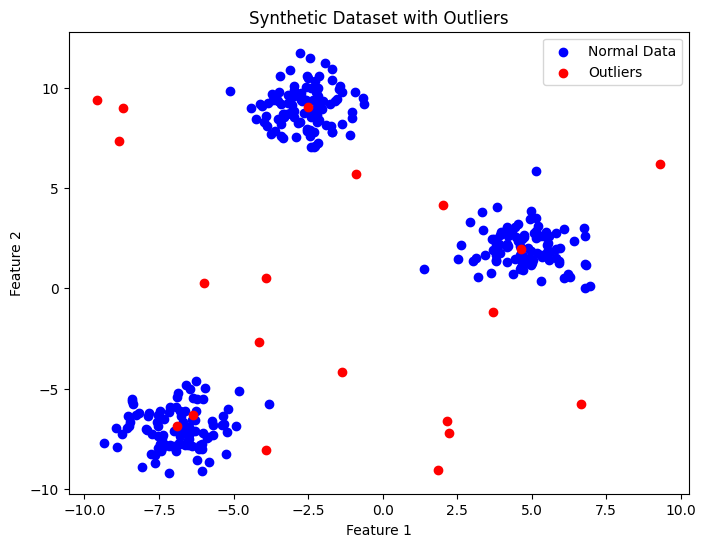

In [8]:
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

np.random.seed(42)
outliers = np.random.uniform(low = -10, high = 10, size = (20, 2))
X_with_outliers = np.vstack([X, outliers])

plt.figure(figsize = (8, 6))
plt.scatter(X[:, 0], X[:, 1], c= 'blue', label='Normal Data')
plt.scatter(outliers[:, 0], outliers[:, 1], c= 'red', label='Outliers')
plt.legend()
plt.title("Synthetic Dataset with Outliers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_with_outliers)

In [6]:
from sklearn.ensemble import IsolationForest
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
iso_forest.fit(X_scaled)

predictions = iso_forest.predict(X_scaled)

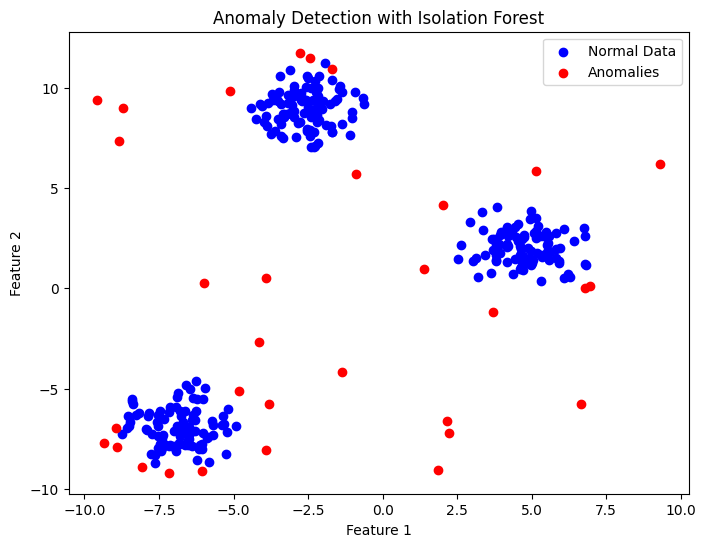

In [14]:
normal_points = X_with_outliers[predictions == 1]
anomaly_points = X_with_outliers[predictions == -1]

plt.figure(figsize = (8, 6))
plt.scatter(normal_points[:, 0], normal_points[:, 1], c= 'blue', label='Normal Data')
plt.scatter(anomaly_points[:, 0], anomaly_points[:, 1], c= 'red', label='Anomalies')
plt.legend()
plt.title("Anomaly Detection with Isolation Forest")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [11]:
from sklearn.metrics import classification_report
true_labels = np.array([1] * 300 + [-1] * 20)

print(classification_report(true_labels, predictions, target_names = ['Normal', 'Anomaly']))

              precision    recall  f1-score   support

      Normal       0.50      0.80      0.62        20
     Anomaly       0.99      0.95      0.97       300

    accuracy                           0.94       320
   macro avg       0.74      0.87      0.79       320
weighted avg       0.96      0.94      0.94       320

